In [243]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
import folium 

In [244]:
df =  pd.read_csv('./data/data.csv')

In [245]:
df.head()

,year,month,day,id,latitude,longitude,salary_min,salary_max
0,2020,1,8,1388290843,NaN,NaN,28800.0,28800.0
1,2020,1,19,1380362331,34.627813,-87.042439,20870.0,20870.0
2,2020,1,19,1413900600,40.721832,-74.044700,26472.0,31764.0
3,2020,1,19,1322520564,38.004921,-121.805789,17652.0,35292.0
4,2020,2,4,1155025237,38.818947,-77.059325,19416.0,35292.0


In [246]:
stops = pd.read_csv('./data/ny_subway_stops.csv')
stops.head()

,subway_stop,lat,lng
0,23 St,40.7429,-73.9928
1,57 St – 7 Ave,40.7655,-73.9803
2,86 St,40.7777,-73.9516
3,Bowery,40.7202,-73.9935
4,Brooklyn Bridge/City Hall,40.7131,-74.0041


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520607 entries, 0 to 1520606
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   year        1520607 non-null  int64  
 1   month       1520607 non-null  int64  
 2   day         1520607 non-null  int64  
 3   id          1520607 non-null  int64  
 4   latitude    1429484 non-null  float64
 5   longitude   1429484 non-null  float64
 6   salary_min  1158693 non-null  float64
 7   salary_max  1158693 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 92.8 MB


In [248]:
stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subway_stop  21 non-null     object 
 1   lat          21 non-null     float64
 2   lng          21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 632.0+ bytes


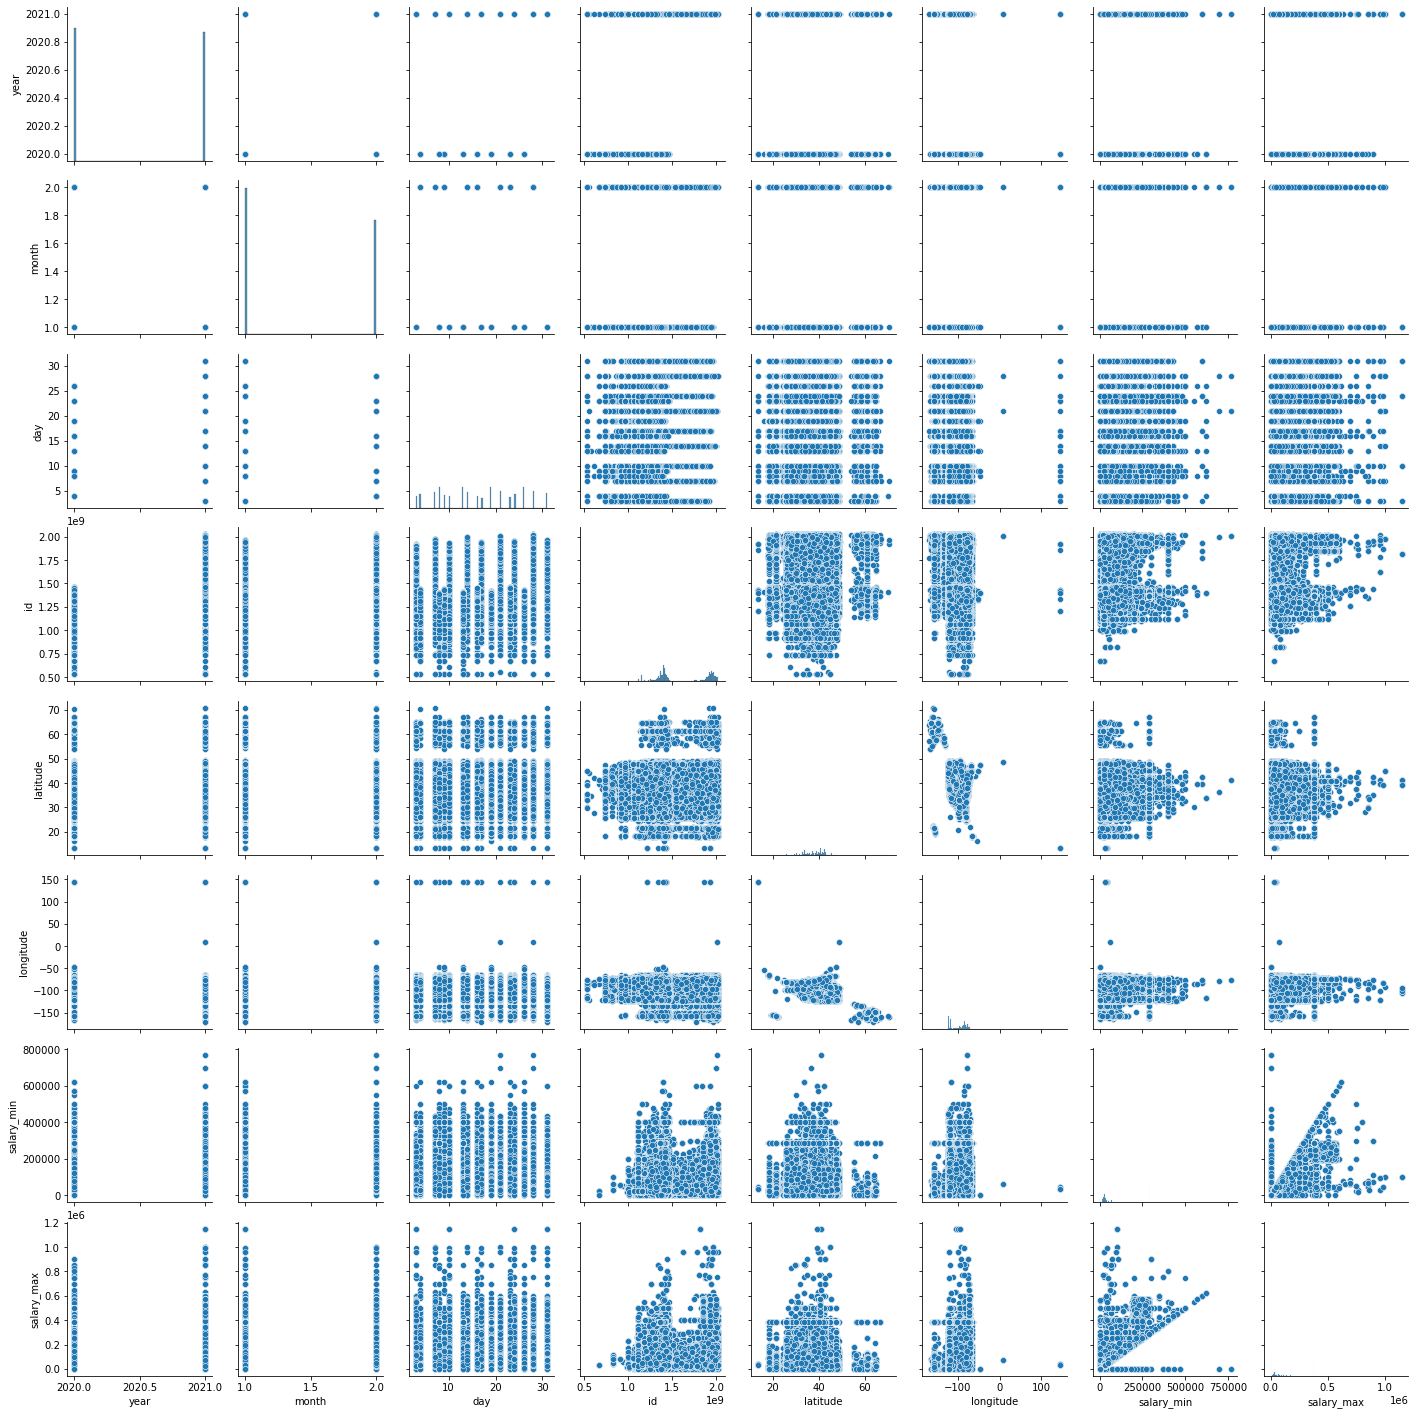

In [249]:
#visual look at the data
sns.pairplot(df)

In [250]:
#creating geodataframe

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

stops_gdf = gpd.GeoDataFrame(
    stops, geometry=gpd.points_from_xy(stops['lng'], stops['lat']))

In [251]:
#data provided in 4326
gdf.set_crs(epsg=4326, inplace=True)
stops_gdf.set_crs(epsg=4326, inplace=True)

,subway_stop,lat,lng,geometry
0,23 St,40.7429,-73.9928,POINT (-73.99280 40.74290)
1,57 St – 7 Ave,40.7655,-73.9803,POINT (-73.98030 40.76550)
2,86 St,40.7777,-73.9516,POINT (-73.95160 40.77770)
3,Bowery,40.7202,-73.9935,POINT (-73.99350 40.72020)
4,Brooklyn Bridge/City Hall,40.7131,-74.0041,POINT (-74.00410 40.71310)
5,Canal St,40.7195,-74.0018,POINT (-74.00180 40.71950)
6,Fulton,40.7094,-74.0083,POINT (-74.00830 40.70940)
7,Houston,40.7286,-74.0053,POINT (-74.00530 40.72860)
8,Penn Station,40.7196,-73.9906,POINT (-73.99060 40.71960)
9,Times Square,40.7580,-73.9855,POINT (-73.98550 40.75800)


C:\Users\ng93n\anaconda3\envs\gis\lib\site-packages\contextily\tile.py:583: RuntimeWarning: divide by zero encountered in log2
  zoom_lon = np.ceil(np.log2(360 * 2.0 / lon_length))


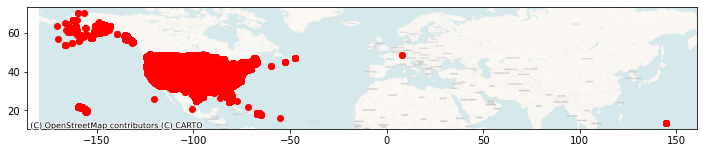

In [252]:
#putting data on a map

fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
stops_gdf.plot(ax=ax)
gdf.plot(color = 'red',ax=ax)
# Add basemap
ctx.add_basemap(ax,crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager)

lot's of outliers (incorrect coordinates)

In [253]:
#some interaction

map1 = folium.Map(location =[stops_gdf['lat'].mean(),stops_gdf['lng'].mean()], tiles = "OpenStreetMap", zoom_start = 8)
folium.GeoJson(gdf,style_function=lambda x: {'color': 'green'}).add_to(map1)
map1

In [254]:
#to reduce number of jobs i'm going to subselect only within some buffer from train station
# to-do
# project data
# find min distance between set of points

stops_gdf.to_crs(epsg=5070,inplace=True)
#stops_gdf

In [255]:
#dist_matrix= stops_gdf.geometry.apply(lambda x: stops_gdf.distance(x))
#dist_matrix


In [256]:
#calculates distance between points, excluding zeros as it is self-distance and then selecting smallest value in a list

min_dist = stops_gdf.geometry.apply(lambda x: stops_gdf.distance(x).nsmallest(2))
min_dist.replace(0, np.nan, inplace=True)
min_dist.min().min()

252.0670389881197

In [257]:
#as buffer is a 'cirle' around the point Radius is needed ( not Diameter), hence division by 2
buffer_d = round(min_dist.min().min()/2,0)
buffer_d 

126.0

In [258]:
#creating buffers around stations using calculated distance
stops_gdf['geom'] = stops_gdf.geometry.buffer(buffer_d)

In [259]:
stops_buffer = stops_gdf[['subway_stop','geom']]
stops_buffer = gpd.GeoDataFrame(stops_buffer, geometry = stops_buffer['geom'],crs = 'epsg:5070')

In [260]:
stops_buffer.crs

<Projected CRS: EPSG:5070>
Name: NAD83 / Conus Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - CONUS - onshore
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: Conus Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [261]:
#gdf.crs

gdf.to_crs(epsg=5070,inplace=True)

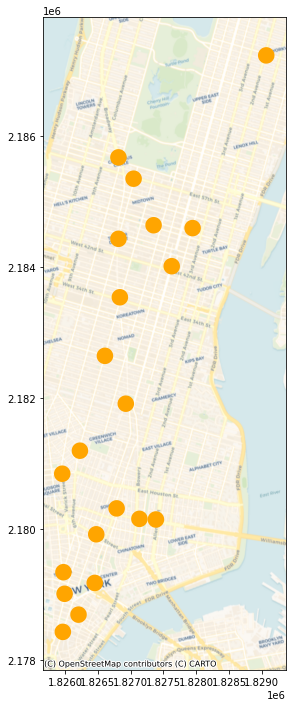

In [262]:
#putting data on a map

fig, ax = plt.subplots(figsize=(20,12))


# Plot the data

stops_buffer.plot(color = 'orange',ax=ax)
# Add basemap
ctx.add_basemap(ax,crs="EPSG:5070", source=ctx.providers.CartoDB.Voyager)

In [263]:
#now selecting ads within those buffer zones


join = gpd.sjoin(gdf,stops_buffer, how ='inner', op ='within')

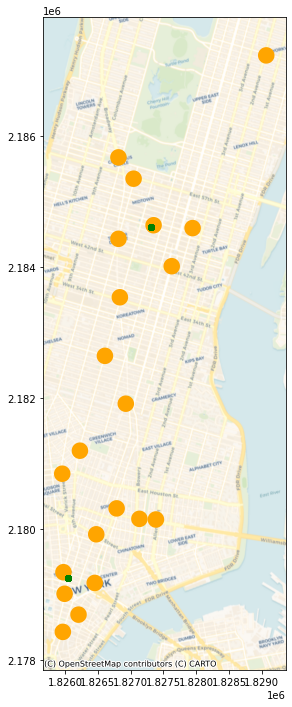

In [264]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,12))
stops_buffer.plot(color = 'orange',ax=ax)
join.plot(color = 'green',ax=ax)
# Add basemap
ctx.add_basemap(ax,crs="EPSG:5070", source=ctx.providers.CartoDB.Voyager)

In [265]:
#very little ads fall within min -dist buffer
#trying 4* size

buffer_d =  min_dist.min().min() 
stops_gdf['geom2'] = stops_gdf.geometry.buffer(buffer_d*2)
stops_buffer = stops_gdf[['subway_stop','geom2']]
stops_buffer2 = gpd.GeoDataFrame(stops_buffer, geometry = stops_buffer['geom2'],crs = 'epsg:5070')

In [266]:

join2 = gpd.sjoin(gdf,stops_buffer2, how ='inner', op ='within')

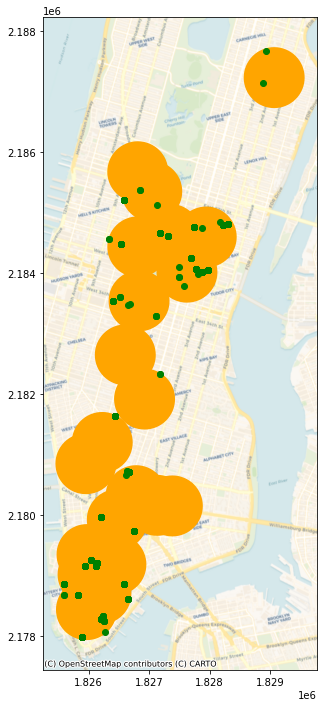

In [267]:
# Plot the data
fig, ax = plt.subplots(figsize=(20,12))
stops_buffer2.plot(color = 'orange',ax=ax)
join2.plot(color = 'green',ax=ax)
# Add basemap
ctx.add_basemap(ax,crs="EPSG:5070", source=ctx.providers.CartoDB.Voyager)

In [268]:
join2.head()

,year,month,day,id,latitude,longitude,salary_min,salary_max,geometry,index_right,subway_stop,geom2
629,2021,1,31,1913764001,40.758931,-73.988611,NaN,NaN,POINT (1826535.999 2184474.886),9,Times Square,"POLYGON ((1827317.592 2184433.202, 1827315.165..."
770,2021,2,28,1966998737,40.758931,-73.988611,NaN,NaN,POINT (1826535.999 2184474.886),9,Times Square,"POLYGON ((1827317.592 2184433.202, 1827315.165..."
3595,2021,2,7,1966940731,40.758931,-73.988611,NaN,NaN,POINT (1826535.999 2184474.886),9,Times Square,"POLYGON ((1827317.592 2184433.202, 1827315.165..."
5038,2021,1,10,1913758750,40.758931,-73.988611,NaN,NaN,POINT (1826535.999 2184474.886),9,Times Square,"POLYGON ((1827317.592 2184433.202, 1827315.165..."
7171,2021,1,17,1913809639,40.758931,-73.988611,NaN,NaN,POINT (1826535.999 2184474.886),9,Times Square,"POLYGON ((1827317.592 2184433.202, 1827315.165..."


In [269]:
#join2.drop('geometry', axis=1, inplace=True)

In [270]:
# demo that GeoDataFrame could be manipulated as DataFrame
#average Min salary per subway stop
join_stats = join2.groupby('subway_stop')['salary_min'].mean().reset_index().sort_values(by='salary_min')

In [271]:
join_stats.head()

,subway_stop,salary_min
11,Spring St,34560.000000
0,57 St – 7 Ave,40366.000000
3,Canal St,41011.826087
2,Brooklyn Bridge/City Hall,42240.000000
9,Lexington Ave – 53 St/51 St,46570.666667


In [272]:
join_stats_stops = pd.merge(join_stats, stops, on='subway_stop')

In [273]:
join_stats_stops.head()

,subway_stop,salary_min,lat,lng,geometry,geom,geom2
0,Spring St,34560.000000,40.7223,-73.9971,POINT (1826785.596 2180318.689),"POLYGON ((1826911.596 2180318.689, 1826910.989...","POLYGON ((1827289.730 2180318.689, 1827287.302..."
1,57 St – 7 Ave,40366.000000,40.7655,-73.9803,POINT (1827044.331 2185350.685),"POLYGON ((1827170.331 2185350.685, 1827169.724...","POLYGON ((1827548.465 2185350.685, 1827546.037..."
2,Canal St,41011.826087,40.7195,-74.0018,POINT (1826474.319 2179923.122),"POLYGON ((1826600.319 2179923.122, 1826599.712...","POLYGON ((1826978.453 2179923.122, 1826976.025..."
3,Brooklyn Bridge/City Hall,42240.000000,40.7131,-74.0041,POINT (1826451.203 2179181.245),"POLYGON ((1826577.203 2179181.245, 1826576.597...","POLYGON ((1826955.337 2179181.245, 1826952.910..."
4,Lexington Ave – 53 St/51 St,46570.666667,40.7571,-73.9719,POINT (1827944.894 2184596.613),"POLYGON ((1828070.894 2184596.613, 1828070.287...","POLYGON ((1828449.028 2184596.613, 1828446.601..."


In [274]:
#droppint obsolete geomertries 
join_stats_stops.drop(['geom','geom2'], axis=1, inplace=True)

In [275]:
type(join_stats)

pandas.core.frame.DataFrame

In [276]:
#coverting bck to gdf
join_stats_stops = gpd.GeoDataFrame(join_stats_stops,geometry = 'geometry')

In [277]:
import geoplot

In [278]:
#join2.rename(columns ={'salary_min':'salary_min_mean', 'geom2':'geometry'},inplace=True)

In [284]:
#join_stats_stops.plot()

In [280]:
join_stats_stops_wgs84 = join_stats_stops.to_crs(epsg = 4326)

In [281]:
join_stats_stops_wgs84.head()

,subway_stop,salary_min,lat,lng,geometry
0,Spring St,34560.000000,40.7223,-73.9971,POINT (-73.99710 40.72230)
1,57 St – 7 Ave,40366.000000,40.7655,-73.9803,POINT (-73.98030 40.76550)
2,Canal St,41011.826087,40.7195,-74.0018,POINT (-74.00180 40.71950)
3,Brooklyn Bridge/City Hall,42240.000000,40.7131,-74.0041,POINT (-74.00410 40.71310)
4,Lexington Ave – 53 St/51 St,46570.666667,40.7571,-73.9719,POINT (-73.97190 40.75710)


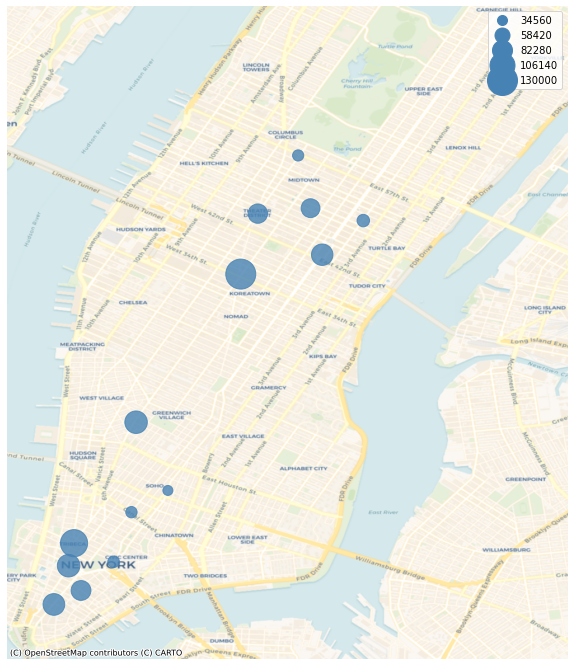

In [282]:

ax2 = geoplot.pointplot(
    join_stats_stops_wgs84, 
    scale='salary_min', limits=(10, 30),
    figsize=(20,12), alpha = 0.8, legend = True
)
ctx.add_basemap(ax2,crs="EPSG:4326", source=ctx.providers.CartoDB.Voyager)

some of the stations didn't have any job ads within selected distance

In [283]:
join_stats_stops_wgs84[join_stats_stops_wgs84['salary_min'].isna()]

,subway_stop,salary_min,lat,lng,geometry
14,86 St,NaN,40.7777,-73.9516,POINT (-73.95160 40.77770)
15,Columbus Circle – 59 St,NaN,40.7688,-73.9821,POINT (-73.98210 40.76880)
16,Union Square,NaN,40.7359,-73.9911,POINT (-73.99110 40.73590)


**Ideas**

+ validation of location specified vs coordinates provided 
+ real road distance vs euclidean distance when creating location based aggreagion (e.g. to exclude Central park)

In [307]:
#Some interactive mapping to see where the highest ratio of F/M is

map = folium.Map(location = [join_stats_stops_wgs84['geometry'].y.mean(), join_stats_stops_wgs84['geometry'].x.mean()], tiles = "OpenStreetMap", zoom_start = 12)

In [308]:
join_stats_stops_wgs84.apply(lambda row: folium.CircleMarker(
           location=[row['lat'],row['lng']], 
           popup=row['subway_stop']).add_to(map), axis=1)

0     <folium.vector_layers.CircleMarker object at 0...
1     <folium.vector_layers.CircleMarker object at 0...
2     <folium.vector_layers.CircleMarker object at 0...
3     <folium.vector_layers.CircleMarker object at 0...
4     <folium.vector_layers.CircleMarker object at 0...
5     <folium.vector_layers.CircleMarker object at 0...
6     <folium.vector_layers.CircleMarker object at 0...
7     <folium.vector_layers.CircleMarker object at 0...
8     <folium.vector_layers.CircleMarker object at 0...
9     <folium.vector_layers.CircleMarker object at 0...
10    <folium.vector_layers.CircleMarker object at 0...
11    <folium.vector_layers.CircleMarker object at 0...
12    <folium.vector_layers.CircleMarker object at 0...
13    <folium.vector_layers.CircleMarker object at 0...
14    <folium.vector_layers.CircleMarker object at 0...
15    <folium.vector_layers.CircleMarker object at 0...
16    <folium.vector_layers.CircleMarker object at 0...
dtype: object

In [309]:
map